# The Spark Foundation - Decision Tree

Arde Apeksha

Importing all necessary libraries



In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
matplotlib inline

Importing Given Dataset and Exploratory Data Analysis(EDA)

In [63]:
 data = pd.read_csv('C:/Users/user/Desktop/FolderName/Iris.csv')

In [64]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [66]:
data.shape

(150, 6)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [68]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [69]:
data.drop("Id", axis=1 , inplace=True)

In [70]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Ploting Data for Visualization (EDA)

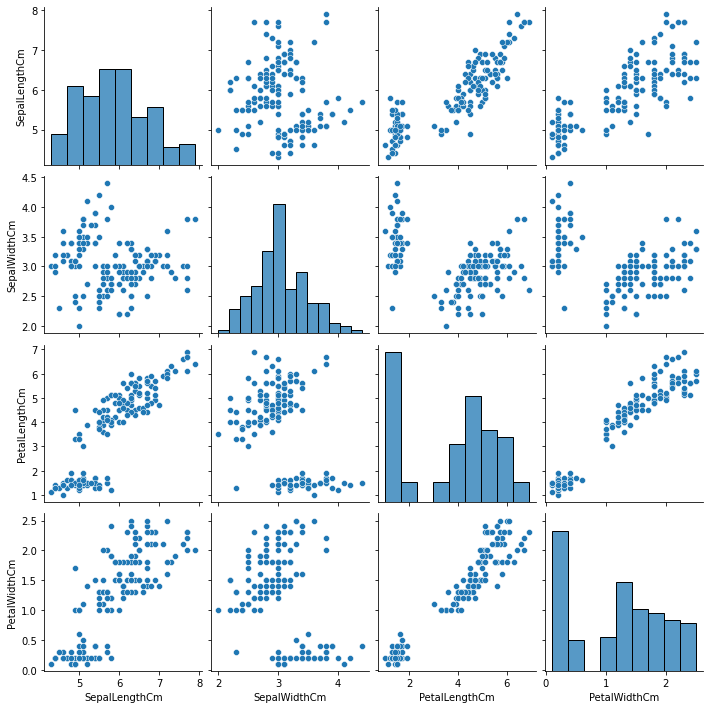

In [72]:
sns.pairplot(data)

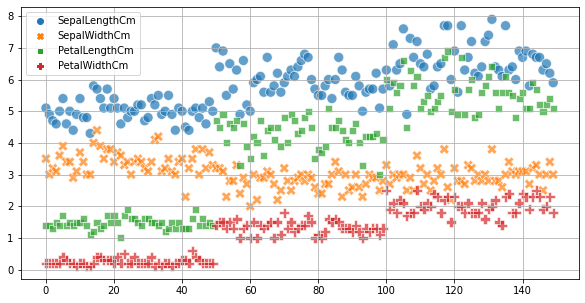

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, s=100, alpha= 0.7)
plt.grid()
plt.show()



#Split train and test set

In [74]:
 x= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30, random_state=0)

Dtree Initialization

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [77]:
y_pred = dtree.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [78]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [79]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [80]:
from io import StringIO
from IPython.display import Image  
import pydotplus
import matplotlib.image as mping
from sklearn import tree
from sklearn.tree import export_graphviz

In [81]:
text_rep = tree.export_text(dtree)
print(text_rep)

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: Iris-virginica



In [82]:
import matplotlib.pyplot as mt

#Decision Tree Visualization

[Text(0.4, 0.9, 'PetalLengthCm <= 2.35\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]\nclass = Iris=versicolor'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-virginica'),
 Text(0.5, 0.7, 'PetalLengthCm <= 4.95\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]\nclass = Iris=versicolor'),
 Text(0.2, 0.5, 'PetalLengthCm <= 1.65\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-setosa'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-setosa'),
 Text(0.3, 0.3, 'SepalWidthCm <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris=versicolor'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris=versicolor'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-setosa'),
 Text(0.8, 0.5, 'PetalLengthCm <= 1.75\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]\nclass = Iris=versicolor'),
 Text(0.7, 0.3, 'PetalLengthCm <= 1.65\nentropy = 0.811\

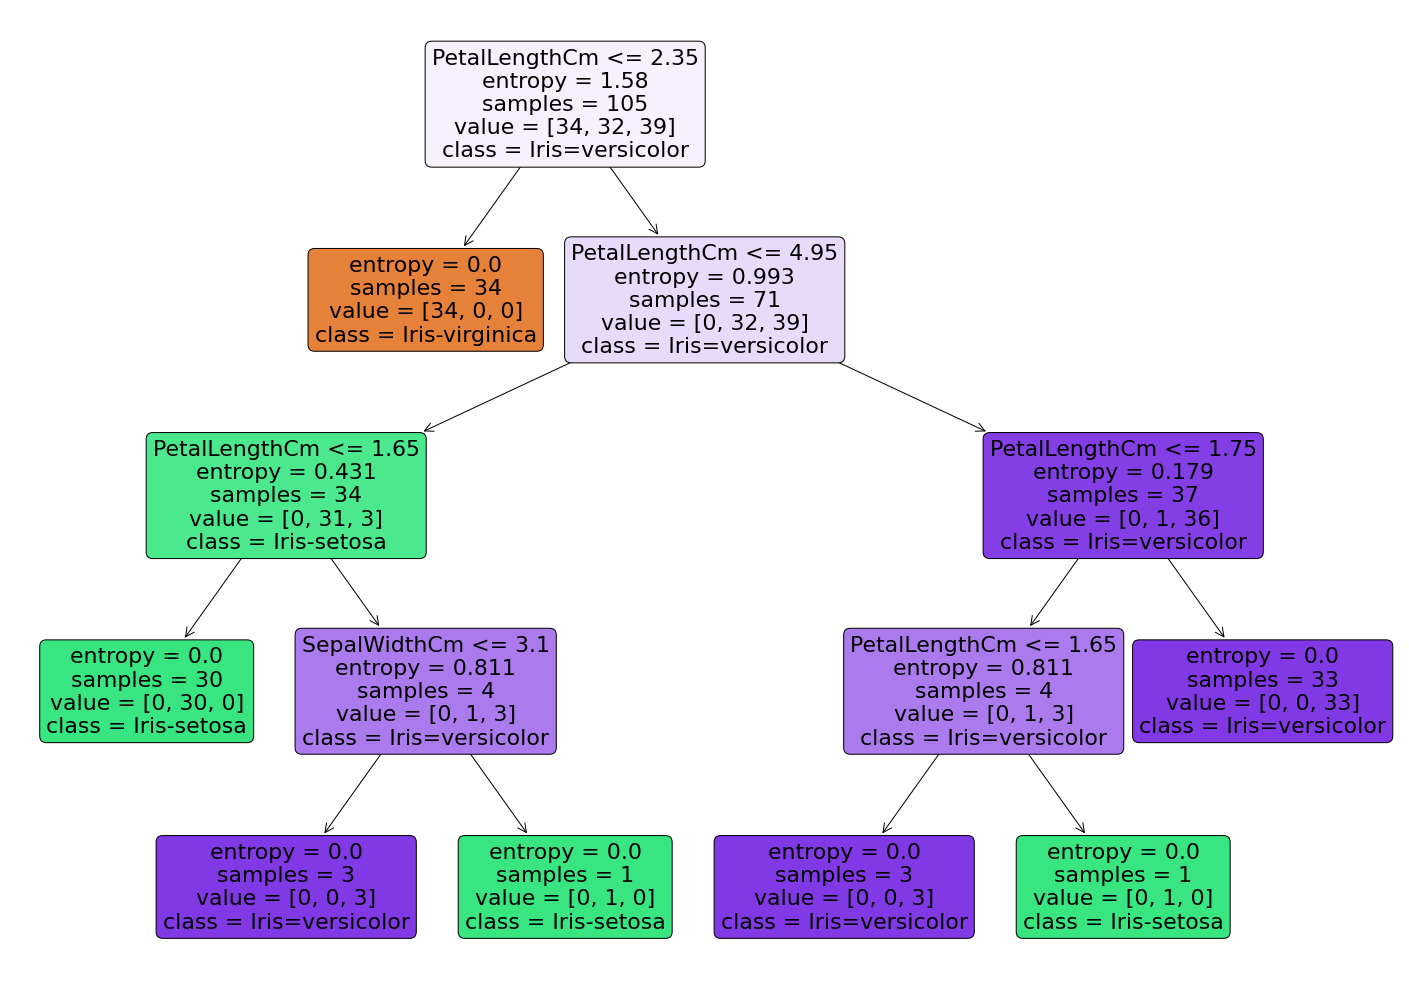

In [83]:
# Visualize the graph
plt.figure(figsize=(25,18))
tree.plot_tree(dtree, 
               feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalLengthCm"],
               class_names=["Iris-virginica","Iris-setosa","Iris=versicolor"], filled= True, rounded=True)

Thank You